In [1]:
# Display plots in the notebook
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Common imports
import numpy as np
import pylab as pl
import pandas as pd
import geopandas as gp
import matplotlib as mpl

In [3]:
# Make plots prettyful
pl.style.use('fivethirtynine')

In [12]:
shp = gp.GeoDataFrame.from_file('../data/CensusTracts2010/CensusTracts2010.shp')
shp['county'] = shp['GEOID10'].str[:5]
counties = [
    #'003', # Box Elder
    '035', # Salt Lake
    '057', # Weber
    '029', # Morgan
    #'043', # Summit
    #'045', # Tooele
    '011', # Davis
    #'051', # Wasatch
    '049', # Utah
]

selector = shp['county'] == '49035'

for c in counties[1:]:
    selector |= shp['county'] == '49' + c

shp = shp[selector]

acs = pd.read_csv('../data/ACS_14_5YR_S0801_with_ann.csv', dtype={'GEOID10': str})

shp = shp.merge(acs, on='GEOID10')

c:\Users\Jeremy\Anaconda\lib\site-packages\IPython\kernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


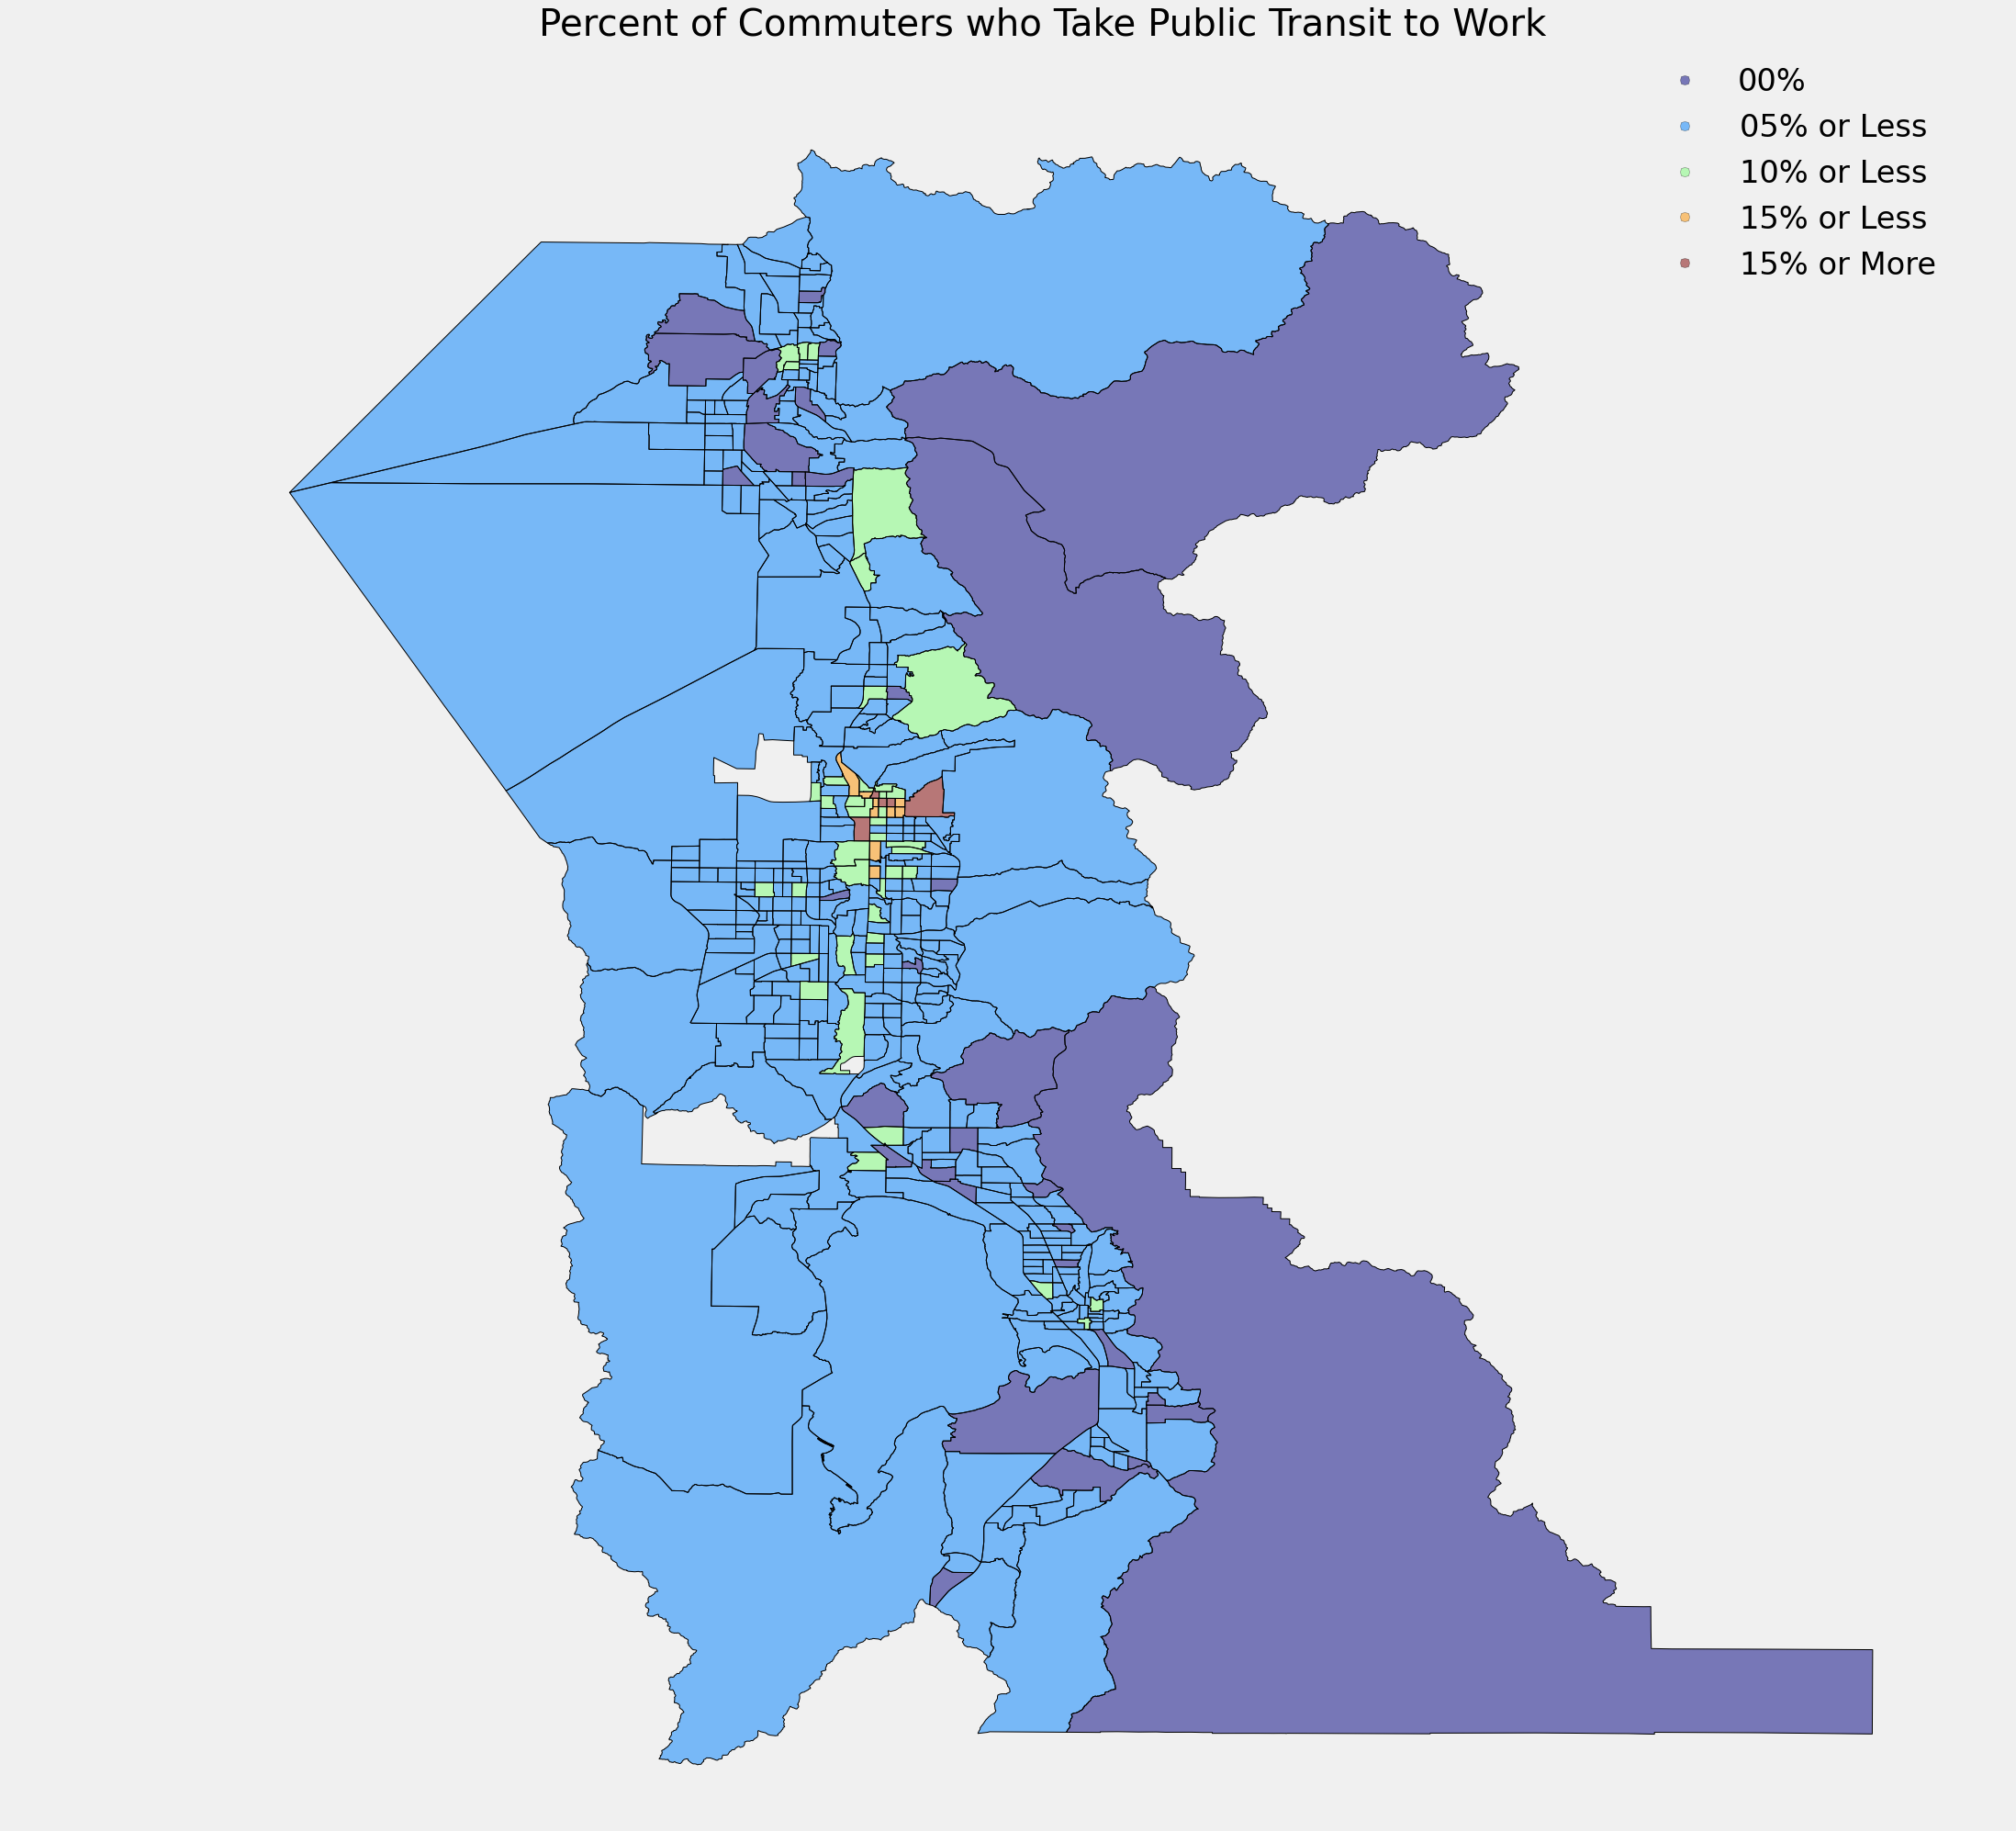

In [13]:
col = 'Total; Estimate; MEANS OF TRANSPORTATION TO WORK - Public transportation (excluding taxicab)'
ranks = [15, 10, 5, 0]
title = 'Percent of Commuters who Take Public Transit to Work'
shp['rank'] = '15% or More'
#shp2['time_rank'][np.isnan(shp2['average_commute_time'])] = "Missing Data"
for i in ranks:
    shp['rank'][shp[col] <= (i)] = ('%s%% or Less' % str(i).zfill(2)) if i > 0 else '00%'

figure, ax = pl.subplots(figsize=(32,32))
ax.axis('off')
shp.plot(
    axes=ax, colormap='jet', legend=True, categorical=True,
    column='rank'
)
ax.set_title(title)


c:\Users\Jeremy\Anaconda\lib\site-packages\IPython\kernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


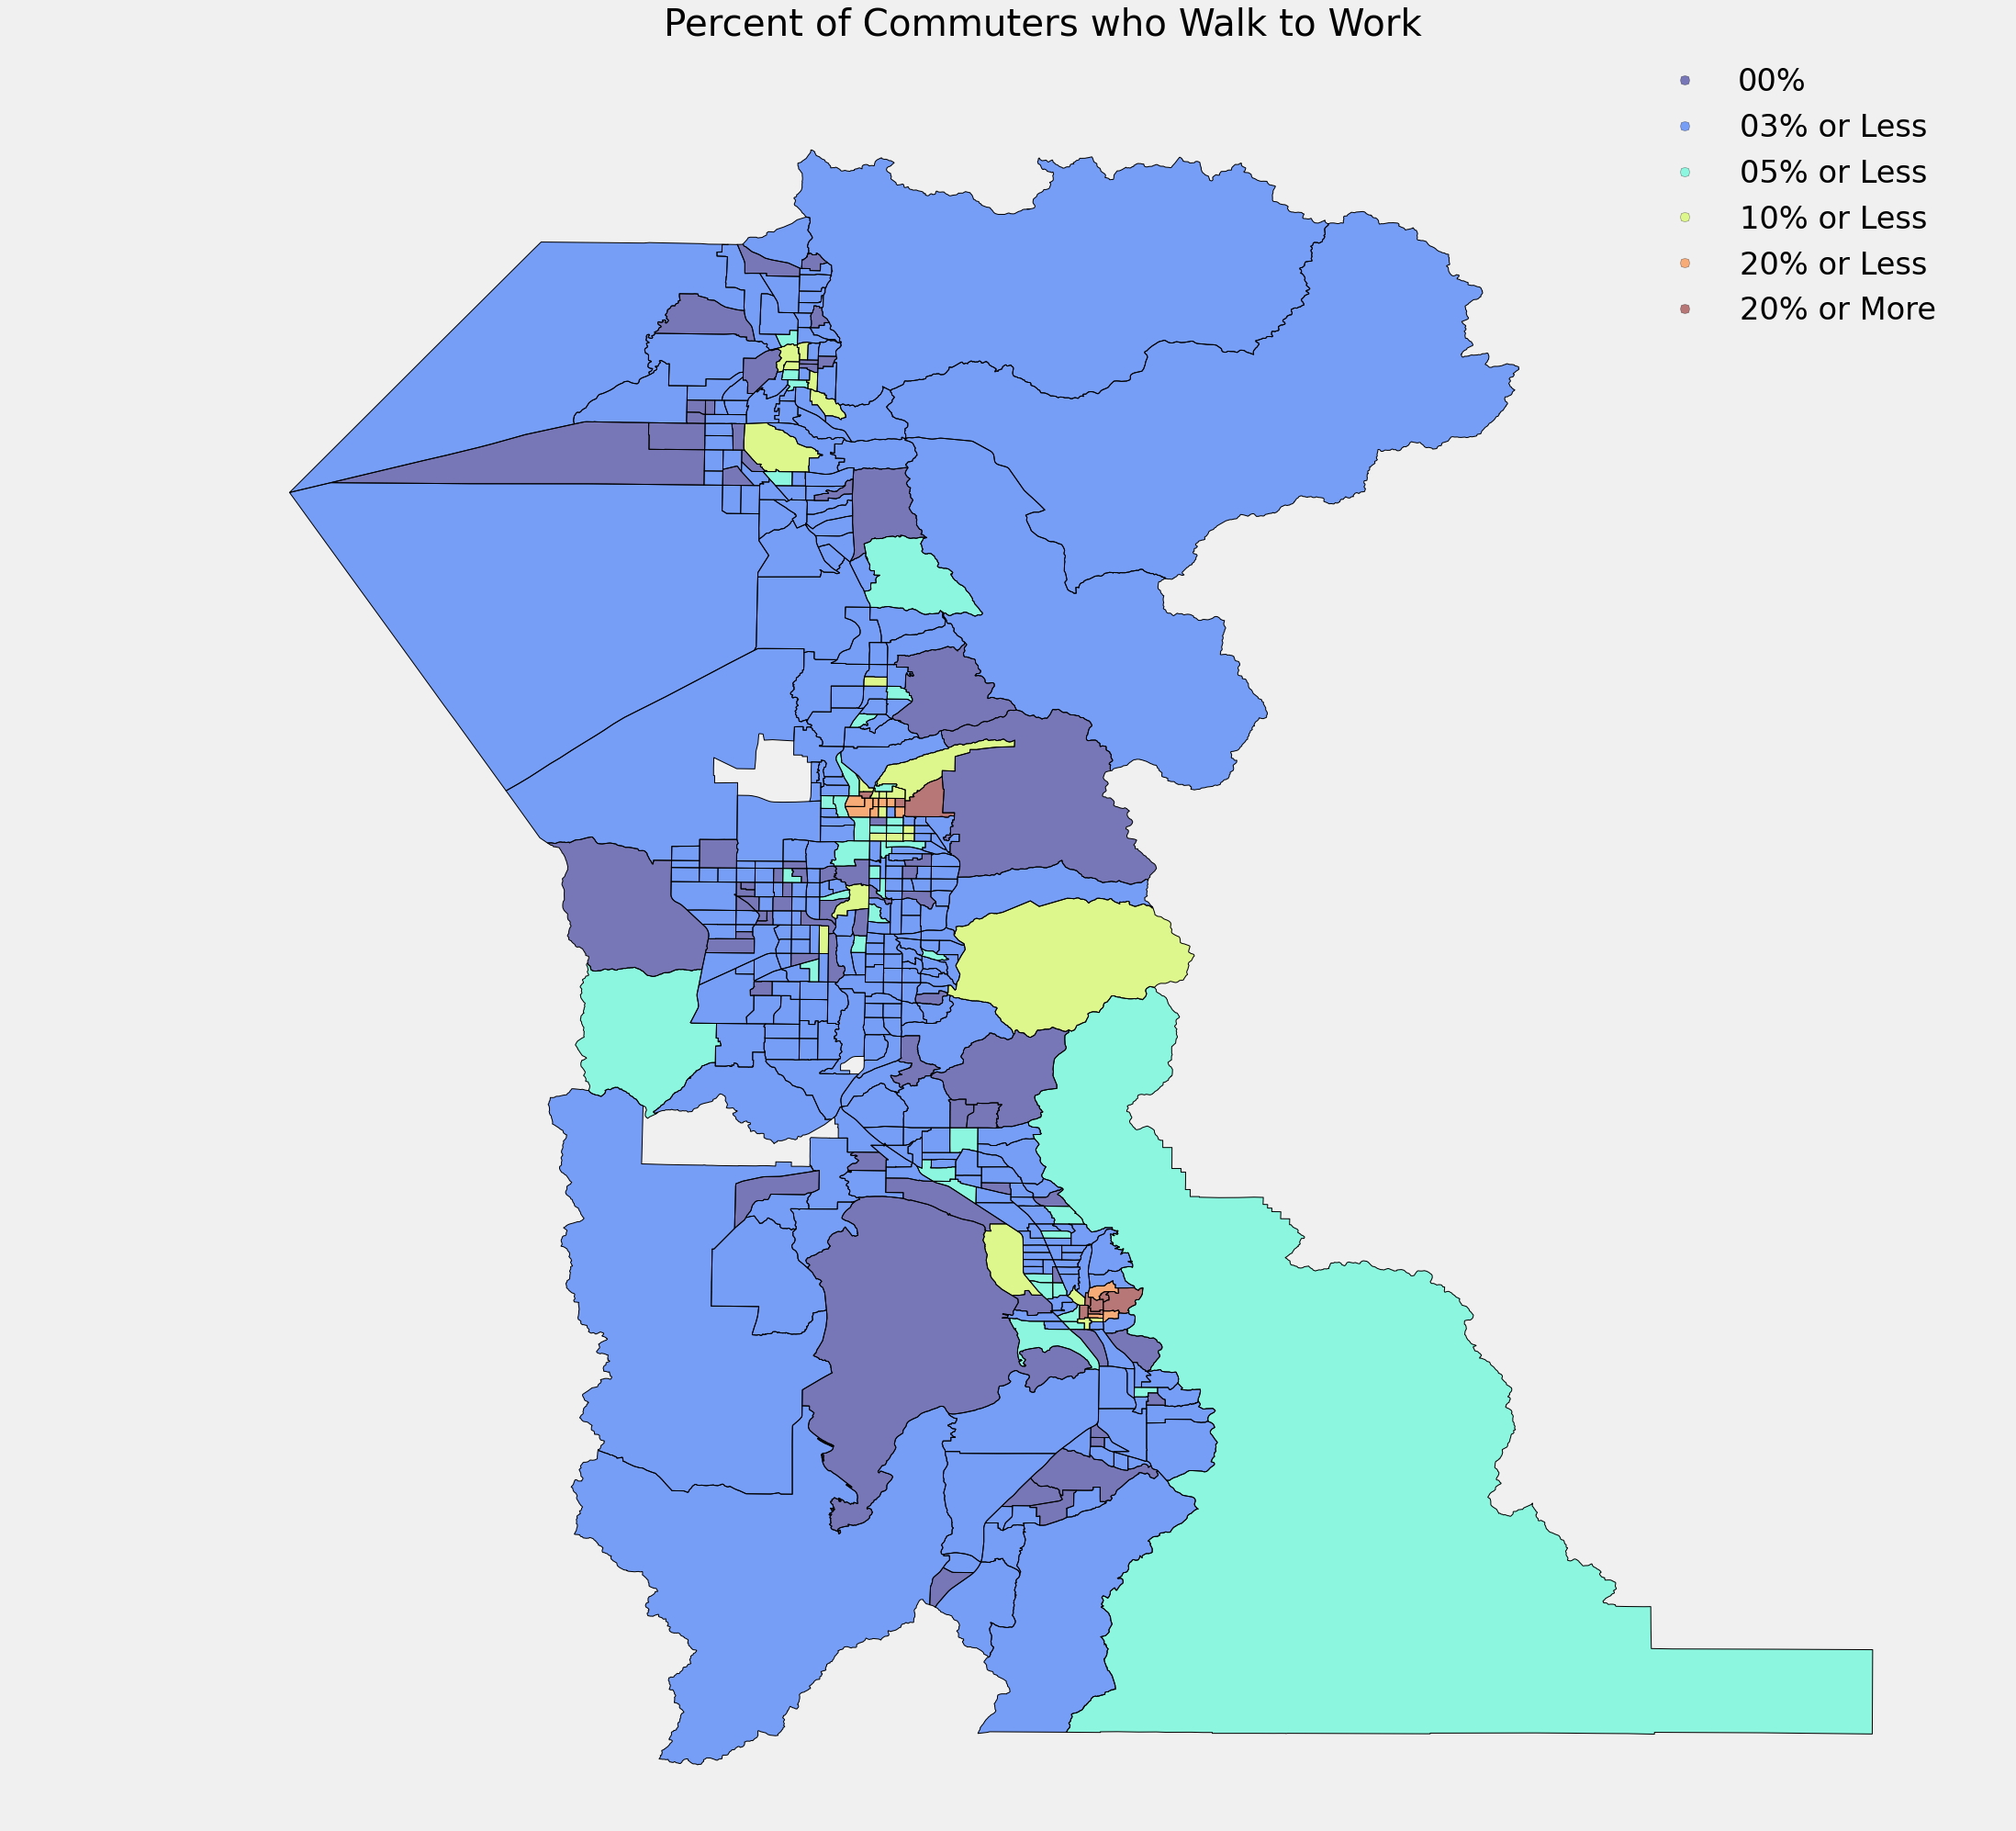

In [14]:
col = 'Total; Estimate; MEANS OF TRANSPORTATION TO WORK - Walked'
ranks = [20, 10, 5, 3, 0]
title = 'Percent of Commuters who Walk to Work'
shp['rank'] = '20% or More'

for i in ranks:
    shp['rank'][shp[col] <= (i)] = ('%s%% or Less' % str(i).zfill(2)) if i > 0 else '00%'

figure, ax = pl.subplots(figsize=(32,32))
ax.axis('off')
shp.plot(
    axes=ax, colormap='jet', legend=True, categorical=True,
    column='rank'
)
ax.set_title(title)

c:\Users\Jeremy\Anaconda\lib\site-packages\IPython\kernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


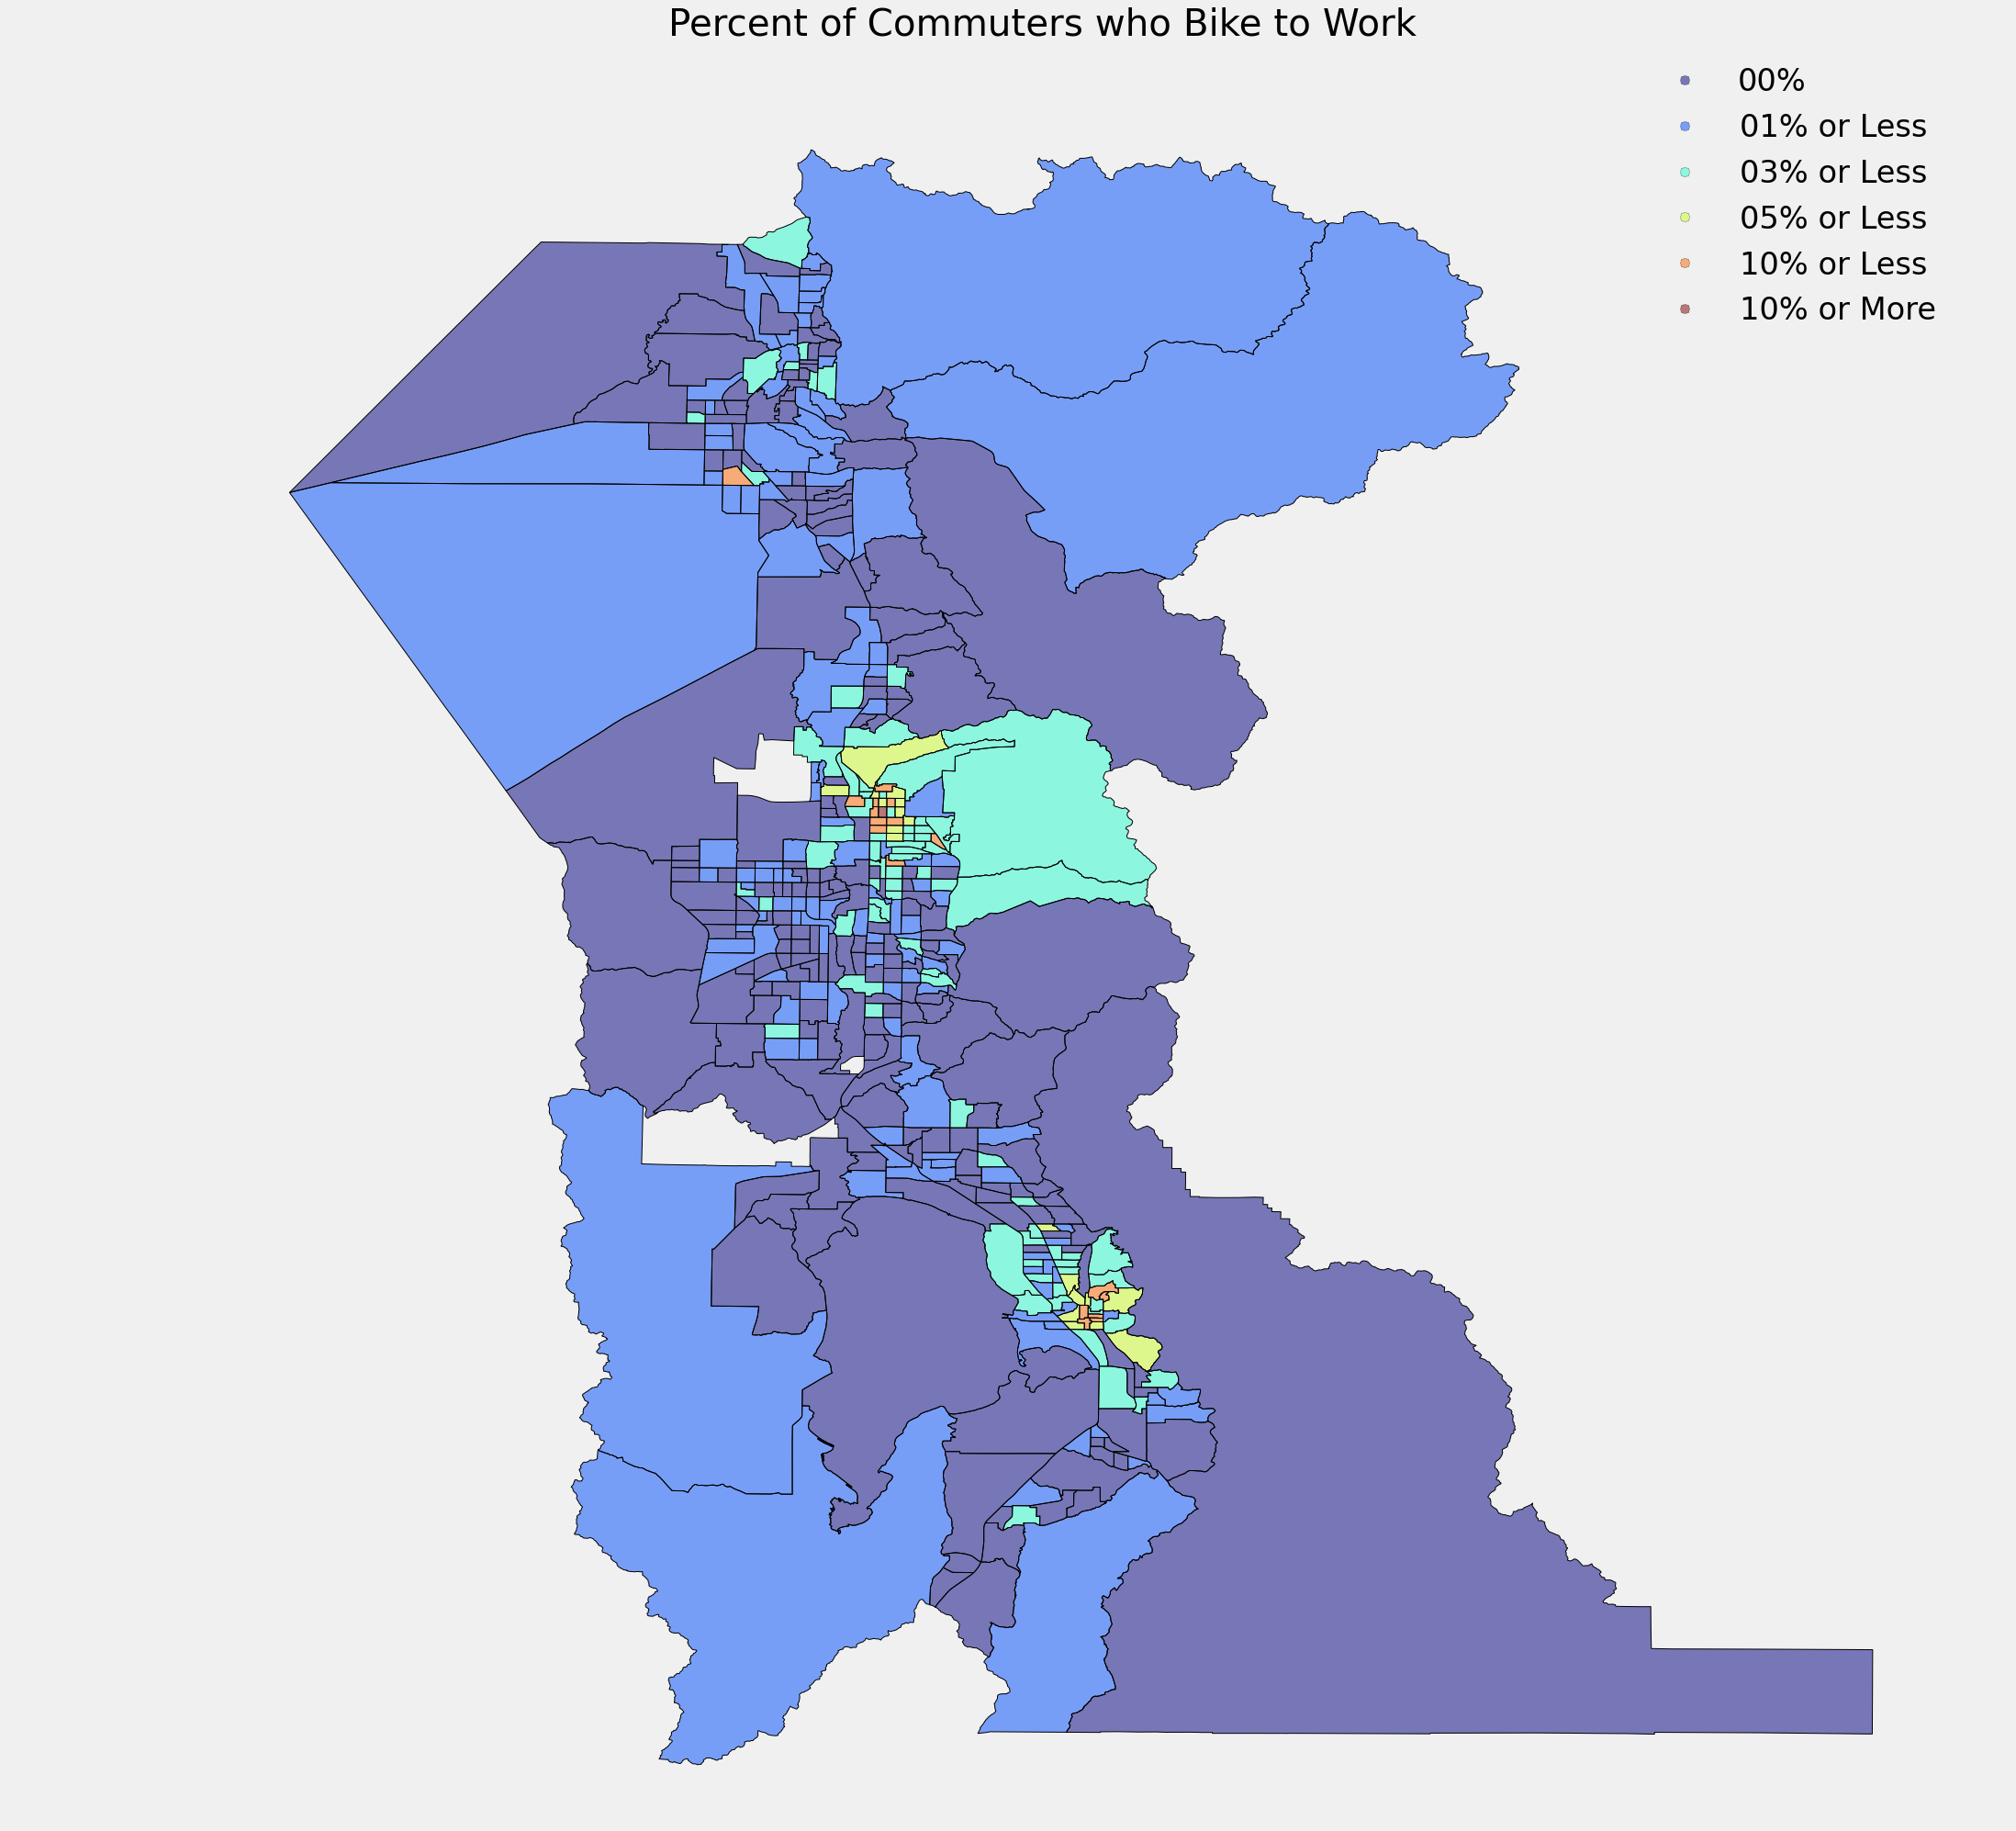

In [15]:
col = 'Total; Estimate; MEANS OF TRANSPORTATION TO WORK - Bicycle'
ranks = [10, 5, 3, 1, 0]
title = 'Percent of Commuters who Bike to Work'
shp['rank'] = '10% or More'

for i in ranks:
    shp['rank'][shp[col] <= (i)] = ('%s%% or Less' % str(i).zfill(2)) if i > 0 else '00%'

figure, ax = pl.subplots(figsize=(32,32))
ax.axis('off')
shp.plot(
    axes=ax, colormap='jet', legend=True, categorical=True,
    column='rank'
)
ax.set_title(title)

In [75]:
#shp = shp[shp['Total; Estimate; TRAVEL TIME TO WORK - Mean travel time to work (minutes)'] != 'N']


In [17]:
shp.drop(shp.index[[328]], inplace=True)
shp['travel_time'] = shp['Total; Estimate; TRAVEL TIME TO WORK - Mean travel time to work (minutes)'].astype(float)

c:\Users\Jeremy\Anaconda\lib\site-packages\IPython\kernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


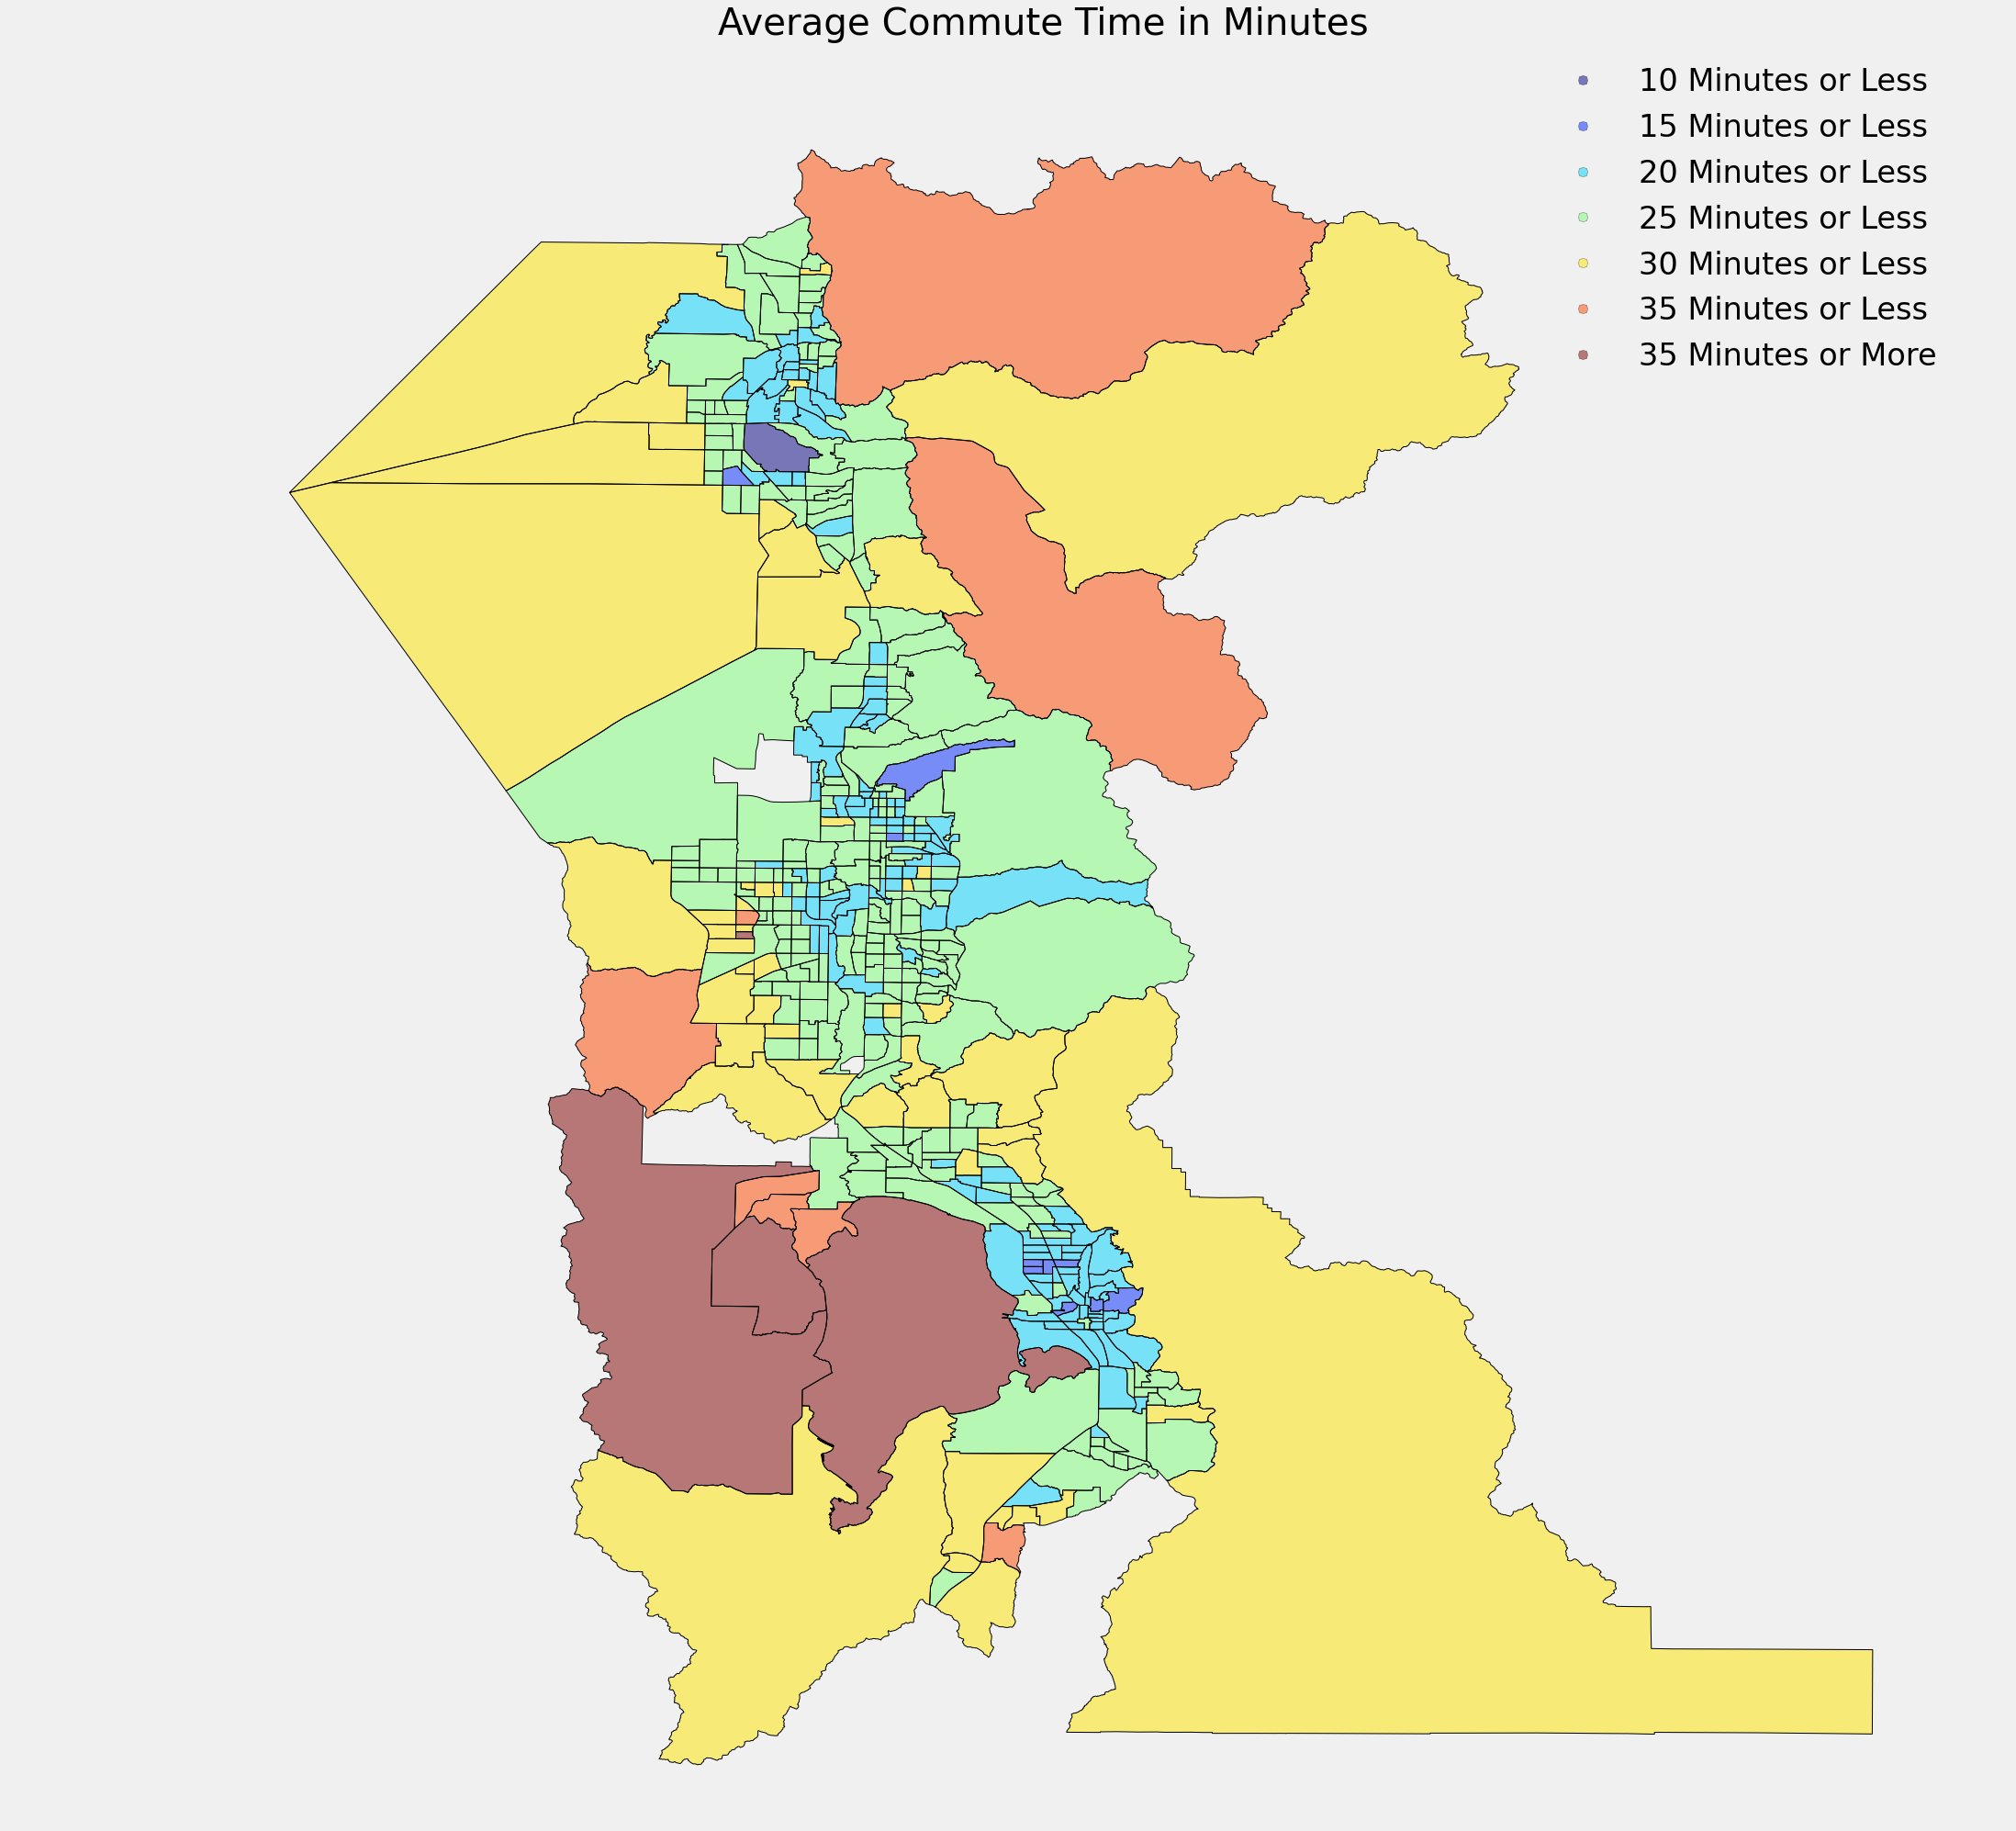

In [18]:
col = 'travel_time'
ranks = [35, 30, 25, 20, 15, 10]
title = 'Average Commute Time in Minutes'
shp['rank'] = '35 Minutes or More'

for i in ranks:
    shp['rank'][shp[col] <= (i)] = ('%s Minutes or Less' % str(i).zfill(2))

figure, ax = pl.subplots(figsize=(32,32))
ax.axis('off')
shp.plot(
    axes=ax, colormap='jet', legend=True, categorical=True,
    column='rank'
)
ax.set_title(title)

,AREALAND,AREAWATR,COUNTYFP10,FUNCSTAT10,GEOID10,HU100,INTPTLAT10,INTPTLON10,LOGRECNO,MTFCC,...,Female; Estimate; PERCENT IMPUTED - Travel time to work,Female; Margin of Error; PERCENT IMPUTED - Travel time to work,Total; Estimate; PERCENT IMPUTED - Vehicles available,Total; Margin of Error; PERCENT IMPUTED - Vehicles available,Male; Estimate; PERCENT IMPUTED - Vehicles available,Male; Margin of Error; PERCENT IMPUTED - Vehicles available,Female; Estimate; PERCENT IMPUTED - Vehicles available,Female; Margin of Error; PERCENT IMPUTED - Vehicles available,rank,travel_time
0,2185421,0,003,S,49003960601,1395,+41.5159999,-112.0089180,0000009,G5020,...,(X),(X),1.1,(X),(X),(X),(X),(X),25 Minutes or Less,23.4
1,31111836,0,003,S,49003960602,793,+41.5292534,-111.9843889,0000010,G5020,...,(X),(X),0.7,(X),(X),(X),(X),(X),30 Minutes or Less,26.4
2,3141945,0,003,S,49003960702,861,+41.4966363,-112.0069151,0000012,G5020,...,(X),(X),0.6,(X),(X),(X),(X),(X),30 Minutes or Less,29.0
3,657894066,101858980,003,S,49003960400,1632,+41.5599748,-112.2854779,0000007,G5020,...,(X),(X),1.1,(X),(X),(X),(X),(X),25 Minutes or Less,22.6
4,35869732,0,003,S,49003960300,2748,+41.7027473,-112.1516054,0000006,G5020,...,(X),(X),1.6,(X),(X),(X),(X),(X),20 Minutes or Less,19.1
5,259632270,547505,003,S,49003960200,2303,+41.7070478,-112.0582397,0000005,G5020,...,(X),(X),0.5,(X),(X),(X),(X),(X),30 Minutes or Less,25.3
6,13530750501,2288874480,003,S,49003960100,1336,+41.5165611,-113.1734542,0000004,G5020,...,(X),(X),0.6,(X),(X),(X),(X),(X),25 Minutes or Less,23.0
7,11770838,6306,003,S,49003960802,1411,+41.4691763,-112.0387186,0000014,G5020,...,(X),(X),0.0,(X),(X),(X),(X),(X),30 Minutes or Less,29.1
8,3948618,0,003,S,49003960701,1661,+41.4956670,-112.0270089,0000011,G5020,...,(X),(X),0.7,(X),(X),(X),(X),(X),25 Minutes or Less,24.0
9,182259243,42392196,003,S,49003960801,1447,+41.4243768,-111.9938780,0000013,G5020,...,(X),(X),0.6,(X),(X),(X),(X),(X),25 Minutes or Less,24.5


In [83]:
shp[shp['Total; Estimate; TRAVEL TIME TO WORK - Mean travel time to work (minutes)'] == 'N']

,AREALAND,AREAWATR,COUNTYFP10,FUNCSTAT10,GEOID10,HU100,INTPTLAT10,INTPTLON10,LOGRECNO,MTFCC,...,Male; Estimate; PERCENT IMPUTED - Travel time to work,Male; Margin of Error; PERCENT IMPUTED - Travel time to work,Female; Estimate; PERCENT IMPUTED - Travel time to work,Female; Margin of Error; PERCENT IMPUTED - Travel time to work,Total; Estimate; PERCENT IMPUTED - Vehicles available,Total; Margin of Error; PERCENT IMPUTED - Vehicles available,Male; Estimate; PERCENT IMPUTED - Vehicles available,Male; Margin of Error; PERCENT IMPUTED - Vehicles available,Female; Estimate; PERCENT IMPUTED - Vehicles available,Female; Margin of Error; PERCENT IMPUTED - Vehicles available
328,2397032547,14382211,043,S,49043964203,1974,+40.8523726,-110.6511974,0000161,G5020,...,(X),(X),(X),(X),0,(X),(X),(X),(X),(X)
